In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import glob

In [2]:
### Graphics parameters
# ---------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'figure.figsize': (24*0.65,6.5*0.75),
            'axes.titlepad': 10}
plt.rcParams.update(params)

In [3]:
### Dictionary with information about samples, conditions and uptake reactions
# ----------------------------------------------------------------------------
uptrxn = {
    "Scerevisiae": {
        "Glucose": "EX_glc__D_e",
        "Glucose - Chemostat": "EX_glc__D_e"
    },
    "Sstipitis": {
        "Glucose": "SS1232",
        "Glucose - Chemostat": "SS1232"
    },
    "Ylipolytica": {
        "Glycerol + Glucose": "y001808" #,y001714"
    },
    "Bsubtilis": {
        "Glucose": "EX_glc__D_e",
        "Fructose": "EX_fru_e",
        "Gluconate": "EX_glcn__D_e",
        "Succinate + Glutamate": "EX_succ_e", # ,EX_glu__L_e",
        "Glycerol": "EX_glyc_e",
        "Malate": "EX_mal__L_e",
        "Malate + Glucose": "EX_mal__L_e", # ,EX_glc__D_e",
        "Pyruvate": "EX_pyr_e",
    },
    "Ecoli": {
        "Acetate": "EX_ac_e",
        "Fructose": "EX_fru_e",
        "Galactose": "EX_gal_e",
        "Gluconate": "EX_glcn_e",
        "Glucose": "EX_glc__D_e",
        "Glycerol": "EX_glyc_e",
        "Pyruvate": "EX_pyr_e",
        "Succinate": "EX_succ_e",
    }
}

In [4]:
### Calculate Pheflux's correlations
# ----------------------------------
dfpheflux = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in ["Scerevisiae", "Sstipitis", "Ylipolytica", "Ecoli", "Bsubtilis"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("pheflux_fluxes/"+mo+".csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale pheflux fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
        
        beta = abs(expCSource / predCSource) # scale factor
        
        # save fluxes in vectors: expfluxes, phefluxes
        expfluxes = []
        phefluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            pheflux = csv[condition].loc["R_"+reaction]*beta
            expfluxes.append(expflux)
            phefluxes.append(pheflux)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(phefluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfpheflux["Data_source"] = sources
dfpheflux["Condition"] = conditions
dfpheflux["Corr"] = pearsons
# dfpheflux

In [5]:
### Calculate spot's correlations
# ----------------------------------
dfspot = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in ["Scerevisiae", "Sstipitis", "Ylipolytica", "Ecoli", "Bsubtilis"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("spot_fluxes/"+mo+".csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale spot fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
        
        beta = abs(expCSource / predCSource) # scale factor
        
        # save fluxes in vectors: expfluxes, spotfluxes
        expfluxes = []
        spotfluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            spot = csv[condition].loc["R_"+reaction]*beta
            expfluxes.append(expflux)
            spotfluxes.append(spot)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(spotfluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfspot["Data_source"] = sources
dfspot["Condition"] = conditions
dfspot["Corr"] = pearsons
# dfspot

In [6]:
### Calculate fbal2's correlations
# ----------------------------------
dffbal2 = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in ["Scerevisiae", "Sstipitis", "Ylipolytica", "Ecoli", "Bsubtilis"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("fbal2_fluxes/"+mo+".csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale fbal2 fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]

        if mo == "Ylipolytica" and condition == "Glycerol + Glucose":
            uptakerxn = "y001714"
            
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
        
        beta = abs(expCSource / predCSource) # scale factor
        
        # save fluxes in vectors: expfluxes, fbale2fluxes
        expfluxes = []
        fbale2fluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            fbal2 = csv[condition].loc["R_"+reaction]*beta
            expfluxes.append(expflux)
            fbale2fluxes.append(fbal2)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(fbale2fluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dffbal2["Data_source"] = sources
dffbal2["Condition"] = conditions
dffbal2["Corr"] = pearsons
# dffbal2

In [7]:
### Pearson's correlation coefficient 
# -----------------------------------
pheflux_corr = dfpheflux["Corr"]
spot_corr = dfspot["Corr"]
fbal2_corr = dffbal2["Corr"]

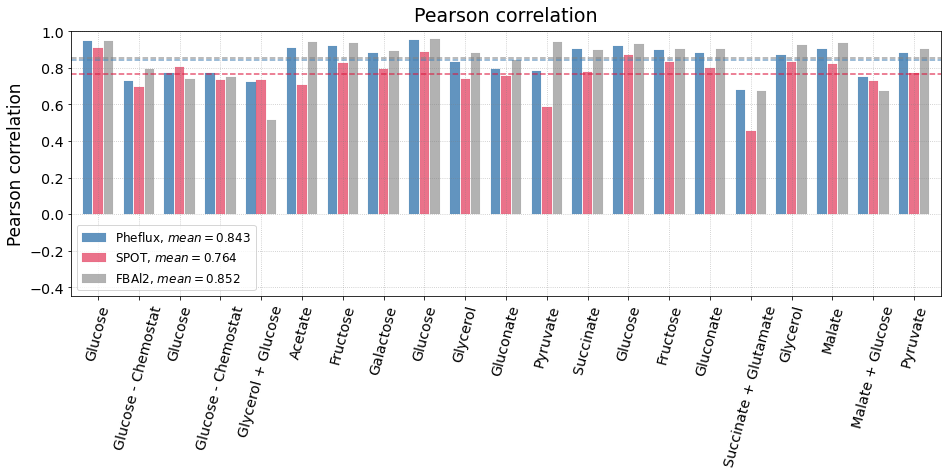

In [8]:
### Figure 2:
# -----------
labels = dfpheflux['Condition']
x = pheflux_corr
y = spot_corr
z = fbal2_corr

n = np.arange(len(labels))*1.5
width = 0.35  # the width of the bars


# barplots
plt.grid(color='grey',linestyle='dotted', alpha=0.5)
phefluxlabel = 'Pheflux, $mean ='+str(round(x.mean(), 3))+'$'
plt.bar( n - width*1.1, x, width, label=phefluxlabel
       , color='steelblue', alpha=0.85, edgecolor='steelblue', linewidth=0.1)

spotlabel = 'SPOT, $mean ='+str(round(y.mean(), 3))+'$'
plt.bar( n , y, width, label=spotlabel
       , color='crimson', alpha=0.6, edgecolor='crimson', linewidth=0.1)

fbal2label = 'FBAl2, $mean ='+str(round(z.mean(), 3))+'$'
plt.bar( n + width*1.1, z, width, label=fbal2label
       , color='grey', alpha=0.6, edgecolor='grey', linewidth=0.1)

# horizontal lines
plt.axhline(x.mean(), c='steelblue', linestyle='--', alpha=0.7)
plt.axhline(y.mean(), c='crimson', linestyle='--', alpha=0.7)
plt.axhline(z.mean(), c='grey', linestyle='--', alpha=0.7)

# others
plt.title('Pearson correlation')
plt.ylabel("Pearson correlation")
plt.legend()

plt.ylim(-0.45, 1)
plt.xlim(-1, 31)
plt.xticks(ticks=n, labels=labels)
plt.xticks(rotation=75)
# plt.savefig('../results/validation/images/pearsoncorrelation.svg',
#                                bbox_inches="tight") #save fig
plt.show()